# タイタニックでデータ分析
- 参考: http://tsjshg.info/udemy/Lec56-59.html

# 目的は4つを明らかにすること
1. タイタニック号の乗客はどのような人達だったのか？
2. それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
3. 乗客は主にどこから来たのか？
4. 家族連れか、単身者か？


## 仮説の重要性
今回は上記の4項目を明らかにすることを目的とするが、実際には「その情報が手に入ったらどういうアクションをとるのか？」を考える必要があります。


# データの準備

## データの読み込み

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../input/titanic/train.csv')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## ひとまず概要を見てみる

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# タイタニック号の乗客はどのような人達だったのか？



## 性別(Sex)

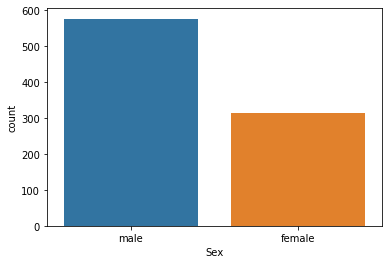

In [6]:
# 性別
sns.countplot('Sex', data=df)

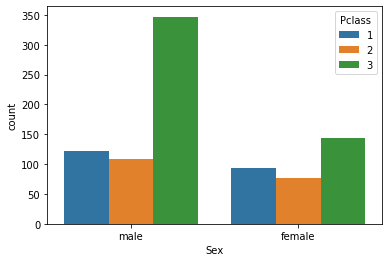

In [7]:
# 性別を客室ランクで層化
sns.countplot('Sex', data=df, hue='Pclass')

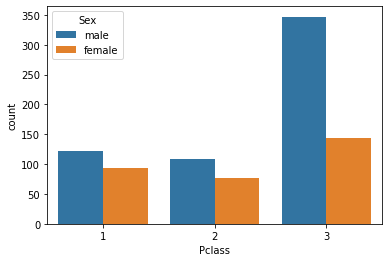

In [8]:
# 客室ランクを性別で層化
sns.countplot('Pclass', data=df, hue='Sex')

## 子供という概念を導入する
- 直接、「子供」を表すデータはない
- ここでは「子供は15歳以下」として考える

In [9]:
def to_person(x):
    """年齢と性別を元にして「male」「female」「child」にわける"""
    age = x['Age']
    sex = x['Sex']

    if age <= 15:
        return 'child'
    else:
        return sex


df['Person'] = df[['Age', 'Sex']].apply(to_person, axis=1)

df[['Age', 'Sex', 'Person']].head(10)

Age     Sex  Person
0  22.0    male    male
1  38.0  female  female
2  26.0  female  female
3  35.0  female  female
4  35.0    male    male
5   NaN    male    male
6  54.0    male    male
7   2.0    male   child
8  27.0  female  female
9  14.0  female   child

In [10]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [11]:
df['Person'].value_counts(normalize=True)

male      0.602694
female    0.304153
child     0.093154
Name: Person, dtype: float64

In [12]:
group_person = df[['Person', 'PassengerId']].groupby(
    'Person', as_index=False).count()
group_person.rename(columns={'PassengerId': 'Count'}, inplace=True)

group_person

Person  Count
0   child     83
1  female    271
2    male    537

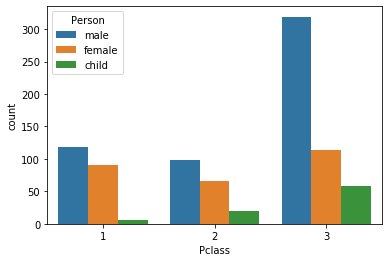

In [13]:
sns.countplot('Pclass', data=df, hue='Person')

- Pclass1には子供の乗客は少ない
- Pclass3には子供の乗客が多い

### 年齢の分布

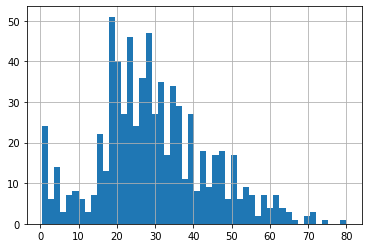

In [14]:
df['Age'].hist(bins=50)

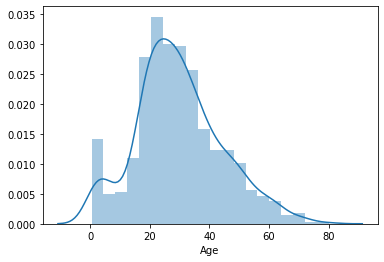

In [15]:
sns.distplot(df['Age'].dropna())

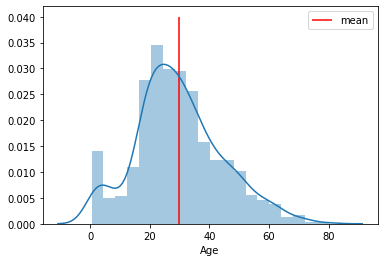

In [16]:
sns.distplot(df['Age'].dropna())
plt.vlines(x=df['Age'].mean(), ymin=0, ymax=0.04, label='mean', colors='red')

plt.legend()
plt.show()

### FacetGridでグラフを1つのプロットに描くことができます。

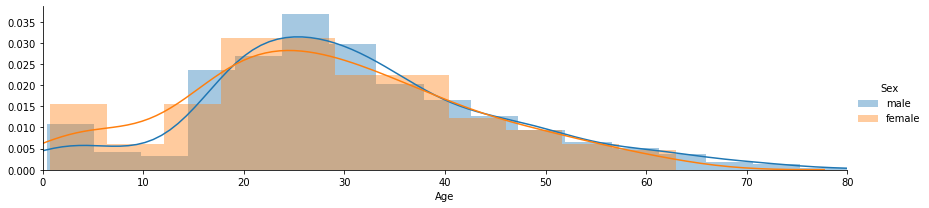

In [17]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)  # 性別で層別化して、グラフを少し横長に設定

fig.map(sns.distplot, 'Age')  # ヒストグラムとkde

fig.set(xlim=(0, df['Age'].max()))  # x軸の範囲を設定

fig.add_legend()

plt.show()

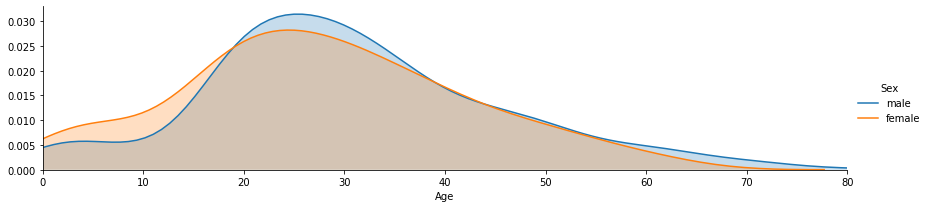

In [18]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)  # この場合はkdeだけのほうが見やすい

fig.set(xlim=(0, df['Age'].max()))

fig.add_legend()

plt.show()

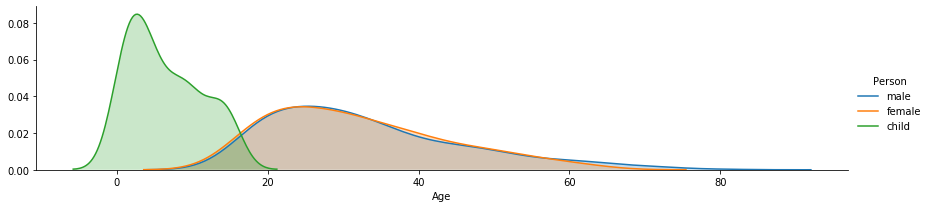

In [19]:
# 子供も含めた分布
fig = sns.FacetGrid(df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

fig.add_legend()

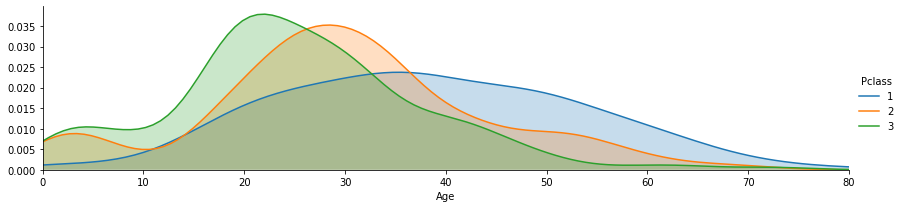

In [20]:
# 客室別の年齢
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.set(xlim=(0, df['Age'].max()))

fig.add_legend()
plt.show()

# それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？

In [21]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [22]:
df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [23]:
df['Cabin'].isnull().sum()

687

In [24]:
deck = df['Cabin'].dropna()

In [25]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [26]:
deck.nunique()

147

In [27]:
# 頭文字だけをみる
deck_df = pd.DataFrame()
deck_df['CabinInitial'] = [c[0] for c in deck]

deck_df['CabinInitial'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinInitial, dtype: int64

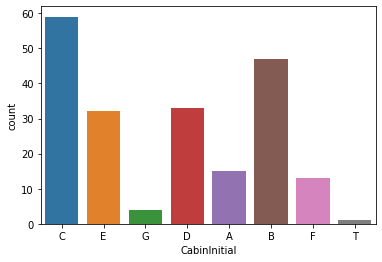

In [28]:
sns.countplot('CabinInitial', data=deck_df)

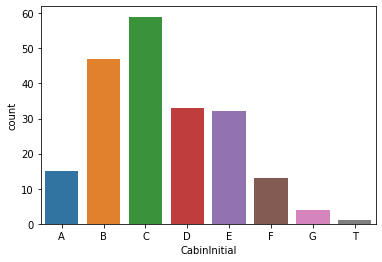

In [29]:
sns.countplot('CabinInitial', data=deck_df.sort_values('CabinInitial'))

- Aから順に並んでいる中、Tがあるので、Tは間違ったデータかもしれない

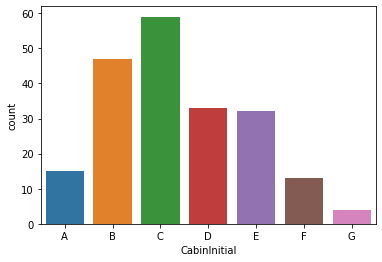

In [30]:
# Tを除去したデータでやってみる
deck_df = deck_df[deck_df['CabinInitial'] != 'T']
sns.countplot('CabinInitial', data=deck_df.sort_values('CabinInitial'))

# 乗客は主にどこから来たのか？

In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [32]:
df['Embarked'].isnull().sum()

2

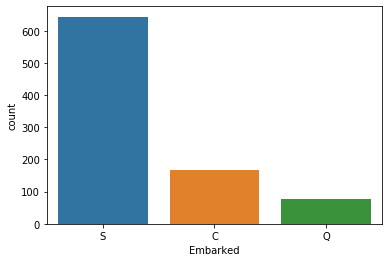

In [33]:
sns.countplot('Embarked', data=df)

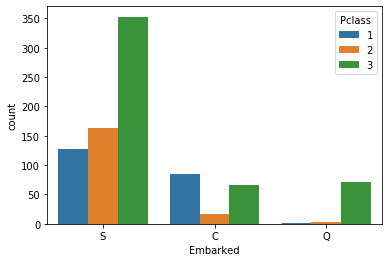

In [34]:
sns.countplot('Embarked', data=df, hue='Pclass')

# 家族連れか、単身者か？

In [35]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [36]:
df['FamilySize'] = df['Parch'] + df['SibSp']

df['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

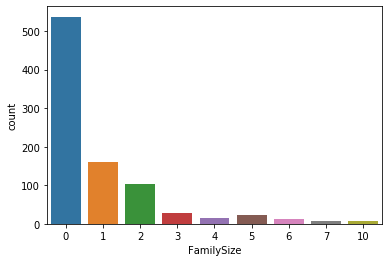

In [37]:
sns.countplot('FamilySize', data=df)

In [38]:
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person  FamilySize  \
0      0         A/5 21171   7.2500   NaN        S    male           1   
1      0          PC 17599  71.2833   C85        C  female           1   
2      0  STON/O2. 3101282   7.9250   NaN        S  female           0   
3      0            113803  53.1000  C123        S  female           1   
4      0            373450   8.0500   NaN        S    male           0   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

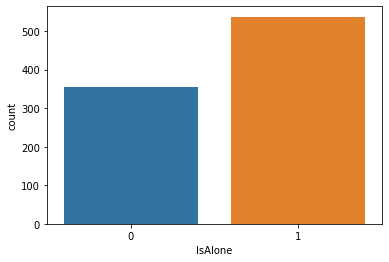

In [39]:
sns.countplot('IsAlone', data=df)

# 死因を探す

In [40]:
df['Survived'].isnull().sum()

0

In [41]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


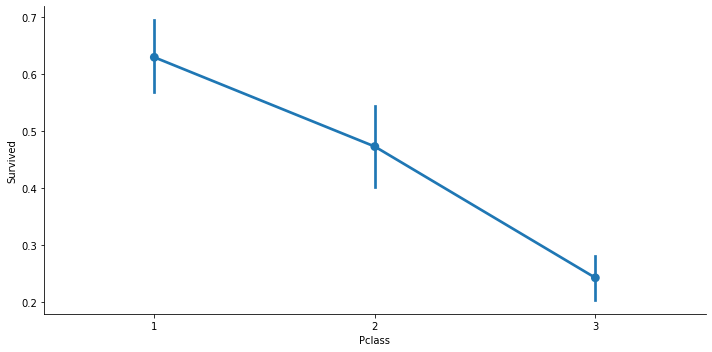

In [42]:
sns.factorplot(x='Pclass',
               y='Survived',
               data=df,
               aspect=2)

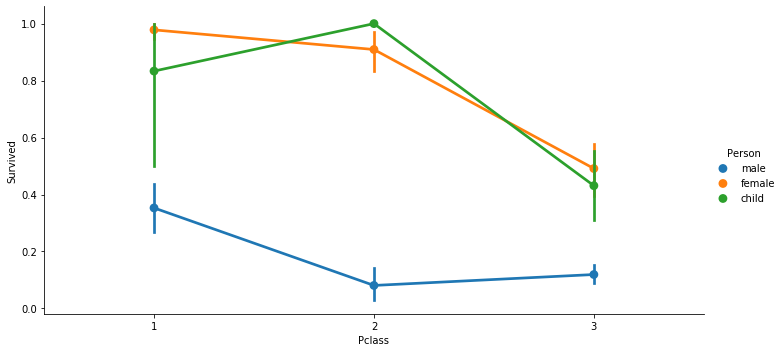

In [43]:
# 性別も考慮する
sns.factorplot(x='Pclass',
               y='Survived',
               hue='Person',
               data=df,
               aspect=2)

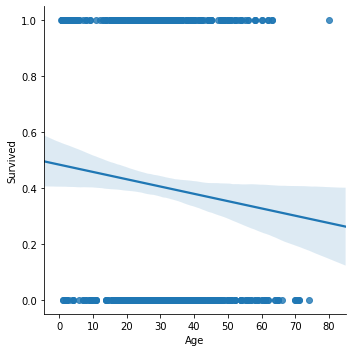

In [44]:
# 年齢と生存率
sns.lmplot(x='Age',
           y='Survived',
           data=df)

年齢が大きくなるほど生存率が低い傾向

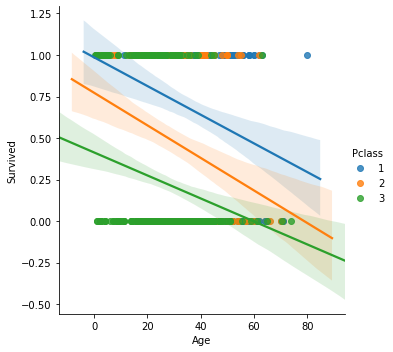

In [45]:
# 客室ランクで層化
sns.lmplot(x='Age',
           y='Survived',
           hue='Pclass',
           data=df)

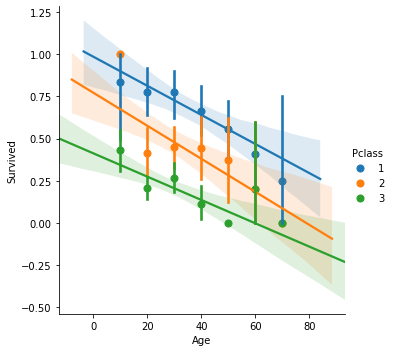

In [46]:
# 客室ランクで層化
sns.lmplot(x='Age',
           y='Survived',
           hue='Pclass',
           data=df,
           x_bins=[10, 20, 30, 40, 50, 60, 70])

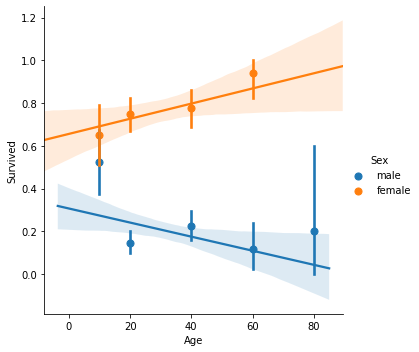

In [47]:
# 性別と年齢のの関係
# Pclass1に高齢の偉い人がいたかもしれない
sns.lmplot(x='Age',
           y='Survived',
           hue='Sex',
           data=df,
           x_bins=[10, 20, 40, 60, 80])

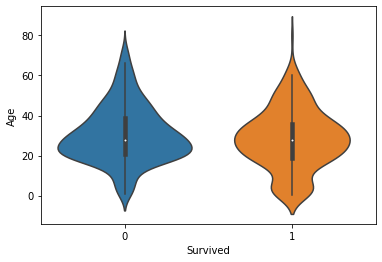

In [58]:
sns.violinplot(x='Survived',
               y='Age', 
               data=df)R

# 演習
1. 乗客が居たデッキは生存率と関係あるか？ また、その答えは感覚的な答えと合うだろうか？
2. 家族連れであることは、事故からの生還率を上げているだろうか？

おわり